In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans # k-means
from sklearn.mixture import GaussianMixture # EM/GMM
from sklearn.cluster import AgglomerativeClustering # hierarchical agglomerative clustering

from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline

np.random.seed(56564)

# 1. Clustering

We've focused on three types of clustering:

* k-means
* EM with Mixtures of Gaussians
* hierarchical (agglomeretive) clustering

We'll use all three types of clustering on our dataset, `data2`. This (fake) data sets contain data about the skill level of different programmers in 5 different langagues: Python, R, C++, SQL, and JavaScript. Higher scores indicate greater levels of mastery in each respective language (negative or 0 scores are valid).

Use `KMeans()`, `GaussianMixture()`, and `AgglomerativeClustering()` to assign clusters to the dataframe `data2`, and answer the following questions. YOU MUST write your responses in markdown cells, and clearly indicate which part (a-g) you are answering.

**a)** For *each* of the 3 clustering algorithms, justify modeling choices you made (such as z-scoring, distance metrics...etc)

**b)** For *each* of the 3 clustering algorithms, how did you choose the number of clusters to use and what is that number?

**c)** For *each* of the 3 clustering algorithms, describe what characterizes each cluster, and provide your own interpretation (for example: "this cluster has people who ____________, which might mean this group is people who are web developers")

**d)** Are cluster assignments similar between the 3 methods (i.e. are data points that are clustered together in one algorithm typically clustered together in another)? Explain in detail how you checked. Use ggplot to make a data visualization to help support your conclusion.

**e)** For *each* of the 3 clustering algorithms, create 1 ggplot graph that you think best show the differences between the clusters generated by that algorithm. Write a caption for each graph explaining what it is showing.

**f)** For your Hierarchical Clustering, plot the dendrogram and explain what the dendrogram tells you about the results.

**g)** Explain the differences between the 3 types of clustering, and explain which method you think would be best for this dataset and why.


You will be graded on the correctness/elegance of your code, and the completeness and clarity of your written responses.

In [2]:
data2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/programmers2.csv")
data2.head()

,py,r,c,sql,js
0,103.709584,76.609626,27.205792,24.470920,-15.009292
1,84.353018,71.080805,26.268507,4.829917,8.337772
2,93.631284,82.878638,13.980748,40.173204,16.713251
3,96.328626,78.214497,31.090891,21.442606,25.595392
4,94.042683,75.448803,15.999360,18.918011,-8.768616


In [3]:
### YOUR CODE HERE ###

# Data Exploration

#(ggplot(data2, aes(x = "py")) + geom_histogram())


In [4]:
#(ggplot(data2, aes(x = "r")) + geom_histogram())

In [5]:
#(ggplot(data2, aes(x = "c")) + geom_histogram())

In [6]:
#(ggplot(data2, aes(x = "sql")) + geom_histogram())

In [7]:
#(ggplot(data2, aes(x = "js")) + geom_histogram())

In [8]:
# KMeans

X = data2[data2.columns]

k_best_KM = 0
max_silhouette_km = 0
km_best = KMeans()


for i in range(2,11):
    km_test = KMeans(n_clusters=i)
    km_test.fit(X)
    tempAssignment = km_test.predict(X)

    sil_test = silhouette_score(X, tempAssignment)

    if sil_test > max_silhouette_km:
        k_best_KM = i
        max_silhouette_km = sil_test
        km_best = km_test

print("The optimal number of groups is: k=" + str(k_best_KM))
print("The silhouette Score for that many groups is:  " + str(max_silhouette_km))
print()

data2["KM_Cat"] = km_best.predict(X)

for i in range(0, k_best_KM):
    print("Average Scores for Cluster " + str(i))
    inGroup = data2['KM_Cat'] == i
    data2Cat = data2.loc[inGroup]

    for name in data2.columns[0:5]:
        avg = data2Cat[name].mean()

        print("\t" + name + ": " + str(avg))
    print()
    

The optimal number of groups is: k=4
The silhouette Score for that many groups is:  0.6513061716958818

Average Scores for Cluster 0
	py: 79.69259810009179
	r: 72.16711073287094
	c: 14.801075286269274
	sql: 44.54729101275027
	js: 7.016620000948465

Average Scores for Cluster 1
	py: 64.16449240660855
	r: 19.631580001528622
	c: 14.33774959841124
	sql: 87.11845566883154
	js: 92.55873958346196

Average Scores for Cluster 2
	py: 17.52137261418682
	r: 21.39097204727867
	c: 29.381931308433973
	sql: 33.081456282592406
	js: 18.132912167455217

Average Scores for Cluster 3
	py: 95.87247977213741
	r: 20.31176468997154
	c: 87.0493113383518
	sql: 22.18286986723092
	js: 31.207815733637716



In [9]:
# Gausian Mixture

k_best_GM = 0
max_silhouette_GM = 0
gm_best = GaussianMixture()


for i in range(2,11):
    gm_test = GaussianMixture(n_components=i)
    gm_test.fit(X)
    tempAssignment = gm_test.predict(X)

    sil_test = silhouette_score(X, tempAssignment)

    if sil_test > max_silhouette_GM:
        k_best_GM = i
        max_silhouette_GM = sil_test
        gm_best = gm_test

print("The optimal number of groups is: k=" + str(k_best_GM))
print("The silhouette Score for that many groups is:  " + str(max_silhouette_GM))
print()

data2["GM_Cat"] = gm_best.predict(X)

for i in range(0, k_best_GM):
    print("Average Scores for Cluster " + str(i))
    inGroup = data2['GM_Cat'] == i
    data2Cat = data2.loc[inGroup]

    for name in data2.columns[0:5]:
        avg = data2Cat[name].mean()

        print("\t" + name + ": " + str(avg))
    print()

The optimal number of groups is: k=4
The silhouette Score for that many groups is:  0.6513061716958818

Average Scores for Cluster 0
	py: 64.16449240660855
	r: 19.631580001528622
	c: 14.33774959841124
	sql: 87.11845566883154
	js: 92.55873958346196

Average Scores for Cluster 1
	py: 79.69259810009179
	r: 72.16711073287094
	c: 14.801075286269274
	sql: 44.54729101275027
	js: 7.016620000948465

Average Scores for Cluster 2
	py: 95.87247977213741
	r: 20.31176468997154
	c: 87.0493113383518
	sql: 22.18286986723092
	js: 31.207815733637716

Average Scores for Cluster 3
	py: 17.52137261418682
	r: 21.39097204727867
	c: 29.381931308433973
	sql: 33.081456282592406
	js: 18.132912167455217



In [10]:
# Agglomerative Clustering

#dendro_sing = sch.dendrogram(sch.linkage(X, method = 'single'))

In [11]:
#dendro_sing = sch.dendrogram(sch.linkage(X, method = 'average'))


In [12]:
#dendro_sing = sch.dendrogram(sch.linkage(X, method = 'complete'))


In [13]:
#dendro_sing = sch.dendrogram(sch.linkage(X, method = 'ward'))


In [14]:
hac = AgglomerativeClustering(n_clusters=4, linkage='ward')

hac.fit(X)

data2["HAC_Cat"] = hac.fit_predict(X)

silhouette_HAC = silhouette_score(X, data2[["HAC_Cat"]])

print("The silhouette Score for that many groups is:  " + str(max_silhouette_GM))
print()

for i in range(0, 4):
    print("Average Scores for Cluster " + str(i))
    inGroup = data2['HAC_Cat'] == i
    data2Cat = data2.loc[inGroup]

    for name in data2.columns[0:5]:
        avg = data2Cat[name].mean()

        print("\t" + name + ": " + str(avg))
    print()


The silhouette Score for that many groups is:  0.6513061716958818

Average Scores for Cluster 0
	py: 79.69259810009179
	r: 72.16711073287094
	c: 14.801075286269274
	sql: 44.54729101275027
	js: 7.016620000948465

Average Scores for Cluster 1
	py: 17.52137261418682
	r: 21.39097204727867
	c: 29.381931308433973
	sql: 33.081456282592406
	js: 18.132912167455217

Average Scores for Cluster 2
	py: 95.87247977213741
	r: 20.31176468997154
	c: 87.0493113383518
	sql: 22.18286986723092
	js: 31.207815733637716

Average Scores for Cluster 3
	py: 64.16449240660855
	r: 19.631580001528622
	c: 14.33774959841124
	sql: 87.11845566883154
	js: 92.55873958346196



In [15]:
data2.head()

,py,r,c,sql,js,KM_Cat,GM_Cat,HAC_Cat
0,103.709584,76.609626,27.205792,24.470920,-15.009292,0,1,0
1,84.353018,71.080805,26.268507,4.829917,8.337772,0,1,0
2,93.631284,82.878638,13.980748,40.173204,16.713251,0,1,0
3,96.328626,78.214497,31.090891,21.442606,25.595392,0,1,0
4,94.042683,75.448803,15.999360,18.918011,-8.768616,0,1,0


a) For each of the 3 clustering algorithms, justify modeling choices you made (such as z-scoring, distance metrics...etc)

- KM:
    - Since each column of data was scored using the same metric, Z-Scoring the data might make the data loose some of its nuance and only serve to obfuscate the results of the clustering. KMeans doesn't allow for modification of the distance metric, so whatever metric is used as the default in SKlearn was used for this example. To analize the meaning of each category, the mean scores for each programming langugage were taken for each cluster.
- EM:
    - Pretty much all the same decisions were made for EM as for KM and for the same reasons: the values weren't z-scored because they're already on the same scale, the default distance metric was chosen because it can't be changed, and the clusters were analyzed by averaging the scores for each cluster.
- HAC:
    - For the same reasons as both other clustering algorithms, the data was not z-scored for HAC. The distance metric was chosen after analyzing the dendrograms generated from each of the methods. Ward produced the best result, by far with extremely high density at the bottom of the graph and very low density higher up, showing that the clusters chosen by the algorithm are welld defined. The clusters chosen ended up being exactly the same as both the other algorithms.

b) For each of the 3 clustering algorithms, how did you choose the number of clusters to use and what is that number?
- KM:
    - A series of clustering simulations were run from k=2 to k=10. The silhouette scores for each test were compared and the number of clusters that yielded the highest silhouette score was chosen to be the number of clusters. For many tests run with different seeds, the same result of 4 clusters was found.
- EM:
    - The number of clusters for EM was chosen in the same way as KM: a series of simulations were run with increasing numbers of clusters and the number with the smallest silhouette score won. In fact, the silhouette score ended up being exactly the same as for KMeans.
- HAC:
    - The number of clusters for HAC was chosen by generating a dendrogram that automatically chooses the number of clusters (likely based on maximizing the silhouette score). Three of the four generated dendrograms split the data into four groups.

c) For each of the 3 clustering algorithms, describe what characterizes each cluster, and provide your own interpretation
- KM:
    - Cluster 0 consists of programmers skilled in python and R. This group is most likely comprised of data scientists like us!
    - Cluster 1 consists of programmers who are experts in SQL and JavaScript with some skill in python. This group most is most likely comprised of web developers who work in both front end (with JS) and backend database management (with SQL), who might occaisionally use python for various applications.
    - Cluster 2 consists of programmers who aren't very skilled in any of the programming languages. This group is most likely comprised of beginner programmers.
    - Cluster 3 consists of programmers who are highly skilled in python and C++. This group most likely consists of desktop application developers or video game programmers.

- EM: (The exact same clusters were found with EM as with KM, however the cluster numbers are different)
    - Cluster 0 consists of programmers who are experts in SQL and JavaScript with some skill in python. This group most is most likely comprised of web developers who work in both front end (with JS) and backend database management (with SQL), who might occaisionally use python for various applications.
    - Cluster 1 consists of programmers skilled in python and R. This group is most likely comprised of data scientists like us!
    - Cluster 2 consists of programmers who are highly skilled in python and C++. This group most likely consists of desktop application developers or video game programmers.
    - Cluster 3 consists of programmers who aren't very skilled in any of the programming languages. This group is most likely comprised of beginner programmers.

- HAC: (Once again, the exact same clusters were found with HAC as with the other two algorithms)
    - Cluster 0 consists of programmers skilled in python and R. This group is most likely comprised of data scientists like us!
    - Cluster12 consists of programmers who aren't very skilled in any of the programming languages. This group is most likely comprised of beginner programmers.
    - Cluster 2 consists of programmers who are highly skilled in python and C++. This group most likely consists of desktop application developers or video game programmers.
    - Cluster 3 consists of programmers who are experts in SQL and JavaScript with some skill in python. This group most is most likely comprised of web developers who work in both front end (with JS) and backend database management (with SQL), who might occaisionally use python for various applications.


d) Are cluster assignments similar between the 3 methods (i.e. are data points that are clustered together in one algorithm typically clustered together in another)? Explain in detail how you checked. Use ggplot to make a data visualization to help support your conclusion.
- Every single method produced the exact same clusters. This was confirmed by comparing the silhouette score for each method, and the mean skill levels for each group across the methods. Each value was equivalent (however, the groups were numbered differently for the different methods, but this is just random variation. Each cluster corresponds directly to a single cluster generated by the other methods)
- Below is a graph that plots the KM categorization vs the EM categorization, each colored with their HAC categorization (with some jitter added to show the colors better). If the groups varried in any way, there would be more than four clusters visible on this plot or some of the points within one cluster would be different colors

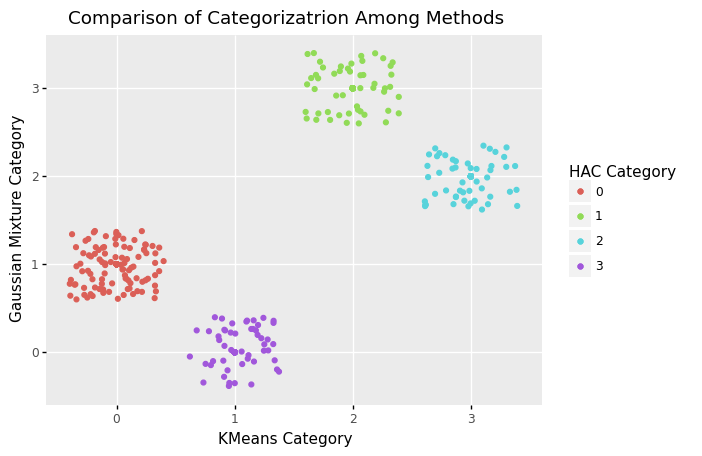

<ggplot: (95118784103)>

In [16]:
(ggplot(data2, aes(x="factor(KM_Cat)", y="factor(GM_Cat)", color="factor(HAC_Cat)")) + 
 geom_point() + 
 geom_jitter() +
 ggtitle("Comparison of Categorizatrion Among Methods") +
 labs(x = "KMeans Category", y = "Gaussian Mixture Category", color="HAC Category"))

e) For each of the 3 clustering algorithms, create 1 ggplot graph that you think best show the differences between the clusters generated by that algorithm. Write a caption for each graph explaining what it is showing.

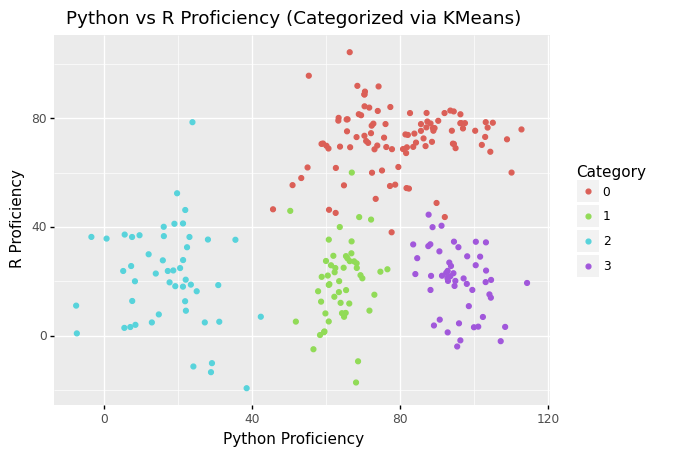

<ggplot: (95123244026)>

In [17]:
(ggplot(data2, aes(x="py", y="r", color="factor(KM_Cat)")) + 
 geom_point() + 
 ggtitle("Python vs R Proficiency (Categorized via KMeans)") +
 labs(x = "Python Proficiency", y = "R Proficiency", color="Category"))

This plot shows the relationship between python proficiency and R proficiency. The categories generated by KMeans show that only one group is consistently proficient with R and that those with lots of R experience typically have very good python skills as well. This is characteristic of the group of data scientists described above.

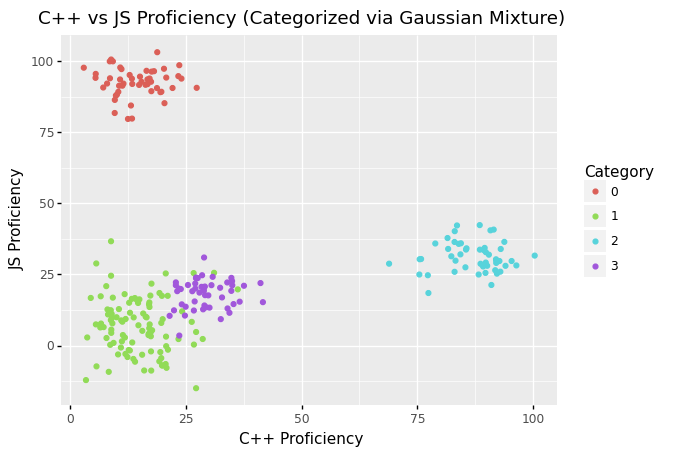

<ggplot: (95123249225)>

In [18]:
(ggplot(data2, aes(x="c", y="js", color="factor(GM_Cat)")) + 
 geom_point() + 
 ggtitle("C++ vs JS Proficiency (Categorized via Gaussian Mixture)") +
 labs(x = "C++ Proficiency", y = "JS Proficiency", color="Category"))

This plot, wherein the categories were chosen by gaussian mixture, shows that many people in the data set either have skill in C++ but don't know JS, have skill in JS but don't know C++, or have little skill in both languages. The group with high C++ proficiency would also have fairly high python proficiency as well (but this is not shown); they are the supposed desktop application/game developers. The group with high JS proficiency would also have high proficieincy in SQL; these are the supposed web developers/database managers. 

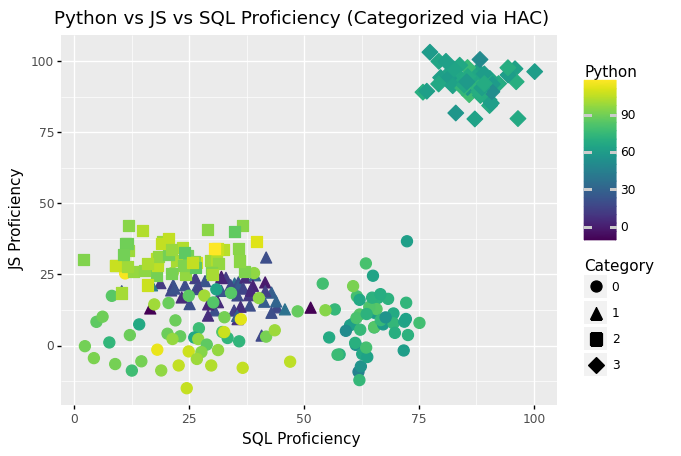

<ggplot: (95099718446)>

In [19]:
(ggplot(data2, aes(x="sql", y="js", color="py", shape="factor(HAC_Cat)")) + 
 geom_point(size=4) + 
 ggtitle("Python vs JS vs SQL Proficiency (Categorized via HAC)") +
 labs(x = "SQL Proficiency", y = "JS Proficiency", shape="Category", color="Python"))

This plot, with categories calculated via HAC shows that most programmers (in the data set) have littel proficiency with JS and SQL except for a few programmers who have high proficiency in both languages. Those with high proficiency in both are the supposed web developers/database managers.

f) For your Hierarchical Clustering, plot the dendrogram and explain what the dendrogram tells you about the results.

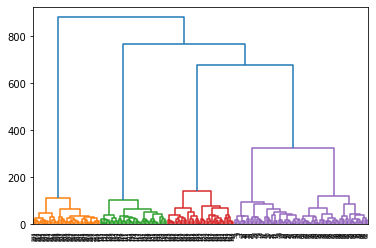

In [20]:
dendro_sing = sch.dendrogram(sch.linkage(X, method = 'ward'))

This dendrogram shows that the four groups are extremely well defined for this data set; each group is tightly clustered, as shown by the high density at the bottom of the dendrogram, and far away from the other clusters, as shown by the low density above the 200 level in the dendrogram.

g) Explain the differences between the 3 types of clustering, and explain which method you think would be best for this dataset and why.

- KMeans works by randomly assigning group centers, calculating groups by assigning each data point to the same group as the closest center, then recalculating the center points until the groups stabilize. This algorithm is very fast compared to the other two, however can sometimes misscategorize data if the groups don't have a spherical shape and a similar size to other groups.
- Gaussian Mixture works very similarly to KMeans but instead of outright assigining a group to each data point, each point is given a probability of which group it is in, then the group with the highest probability is chosen. This algorithm runs a bit slower than KMeans but can accurately categorize much more complex shaped groups.
- Agglomerative Clustering works by recursively and hirearcicially grouping together clusters that are close together starting with individual points. This algorithm is very useful as it shows a tree-like relationship between groups and can be easily split into as many groups as is necessary for the task at hand. The biggest drawback of this algorithm is the time complexity, so it is significatntly slower than KMeans and Gaussian Mixture.
- For this data set, each algorithm performed identically to one another, so the only aspect of the three algorithms that matter in this case is the speed of the algorithm. KMeans is the quickest of the three, so it would be the best choice in categorizing this data set.